# GRIP : The Sparks Foundation

## Data Science & Business Analytics Intern

## Author : Alpesh Patel

# Task 1 : Prediction using Supervised ML

## Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### y = mx + c , where m = slope, c = y-intercept 

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Reading data from remote link

Data can be found at http://bit.ly/w-data

In [2]:
url = "http://bit.ly/w-data"

dataset = pd.read_csv(url)
print("Data imported successfully")
dataset.to_csv (r'dataset.csv', index=None)

Data imported successfully


## Importing the dataset

In [3]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.shape

(25, 2)

In [6]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Relationship between the data

In [8]:
# correlation between variables
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


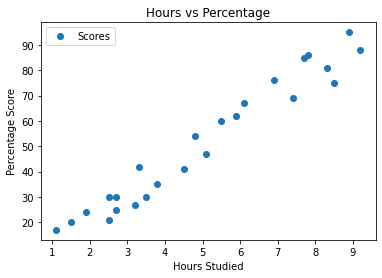

In [9]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

***From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.***

# Preparing the data

## Cheack Missing value

In [10]:
# cheack missing value
dataset.isna().sum()

Hours     0
Scores    0
dtype: int64

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

## Training the Simple Linear Regression model on the Training set

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training Suceessful complete.")

Training Suceessful complete.


## Visualising the Training set results

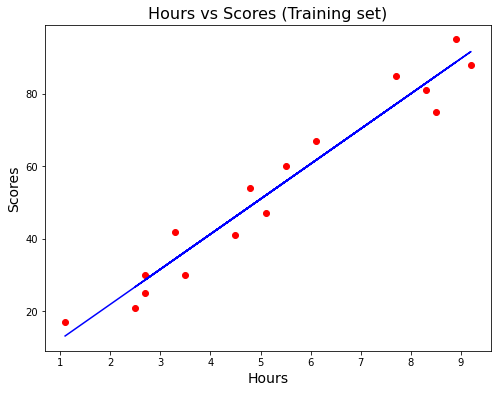

In [15]:
# Plotting the regression line for taining set
#line = regressor.coef_*X + regressor.intercept_

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Training set)', fontsize = 16)
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Scores', fontsize = 14)
plt.show()

## Making Predictions OR Predicting the Test set result

In [16]:
# Testing data - In Hours
print(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]]


In [17]:
# Predicting the scores
y_pred = regressor.predict(X_test) 
y_pred

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

## Visualising the Test set results

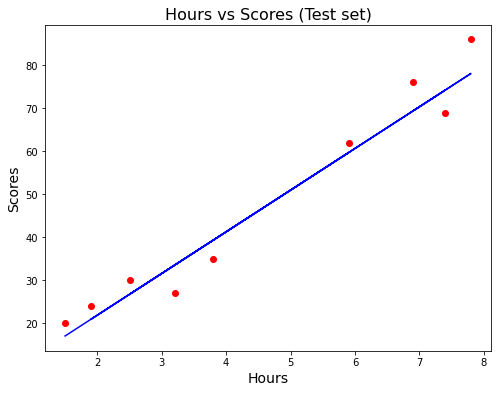

In [18]:
# Plotting the regression line for test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Hours vs Scores (Test set)', fontsize = 16)
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Scores', fontsize = 14)
plt.show()

In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


## Accuracy of our model OR Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [20]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.691397441397446


In [21]:
# mean_squared_error
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

25.463280738222593

In [22]:
# Accuracy Score 
regressor.score(X_test, y_test)

0.9555700801388128

## Test My data

In [23]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.14523314523316
